Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([[4],[1],[2],[5]])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
print("phi = \n" + str(phi))

phi = 
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
pinv1 = np.matmul(np.linalg.inv(np.matmul(phi.transpose(), phi)), phi.transpose())
w = np.matmul(pinv1, y)
print("w1 =\n" + str(w))

pinv2 = np.linalg.pinv(phi)
w2 = np.matmul(pinv2, y)
print("\nw2 =\n" + str(w2))

print("\nw jednak w2? " + str(np.allclose(w, w2)))

w1 =
[[2.2       ]
 [0.45714286]]

w2 =
[[2.2       ]
 [0.45714286]]

w jednak w2? True


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [7]:
import sklearn.metrics
h = []
for i in range(len(phi)):
    h.append(np.matmul(w.transpose(), phi[i]))
h = np.array(h)
error = sklearn.metrics.mean_squared_error(y, h)
print(error)

2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
try:
    w3 = np.matmul(np.linalg.inv(phi), y)
    print(w3)
except np.linalg.LinAlgError:
    print("Phi nije kvadratna matrica i zato nema inverz!\n")

M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('M = \n' + str(M))
print("M je singularna kvadratna matrica te zato preslikavanje u višu dimenziju ne može dovesti do matrice pogodne za traženje inverza.")

Phi nije kvadratna matrica i zato nema inverz!

M = 
[[1 2 3]
 [4 5 6]
 [7 8 9]]
M je singularna kvadratna matrica te zato preslikavanje u višu dimenziju ne može dovesti do matrice pogodne za traženje inverza.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression().fit(X, y)
w4 = np.array([reg.intercept_, reg.coef_], float)
print("w =\n" + str(w))
print("\nw4 =\n" + str(w4))
print("\nw jednak w4? " + str(np.allclose(w, w4)))

w =
[[2.2       ]
 [0.45714286]]

w4 =
[[2.2       ]
 [0.45714286]]

w jednak w4? True


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    y = []
    for x in X:
        y.append(f(x) +  np.random.normal(0, noise))
    return np.array(y)

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

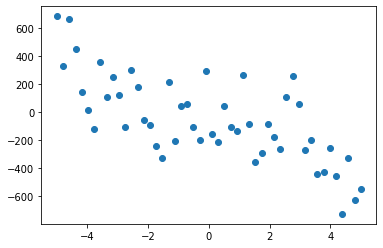

In [13]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 200)
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Pogreška je 32999.69478140017


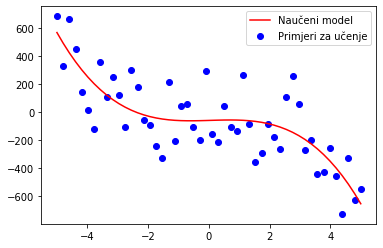

In [14]:
poly = PolynomialFeatures(3).fit(X, y)
phi = poly.fit_transform(X)
reg = LinearRegression().fit(phi, y)
h = np.array(reg.predict(phi))
error = sklearn.metrics.mean_squared_error(y, h)
print("Pogreška je " + str(error))
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X, y, c='b', label='Primjeri za učenje')
ax1.plot(X, h, c='r', label='Naučeni model')
plt.legend(loc='upper right')
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Pogreška modela stupnja 1 je 43587.66790653279
Pogreška modela stupnja 3 je 32999.69478140017
Pogreška modela stupnja 5 je 32940.590089987025
Pogreška modela stupnja 10 je 28069.04181514827
Pogreška modela stupnja 20 je 18303.627515070653


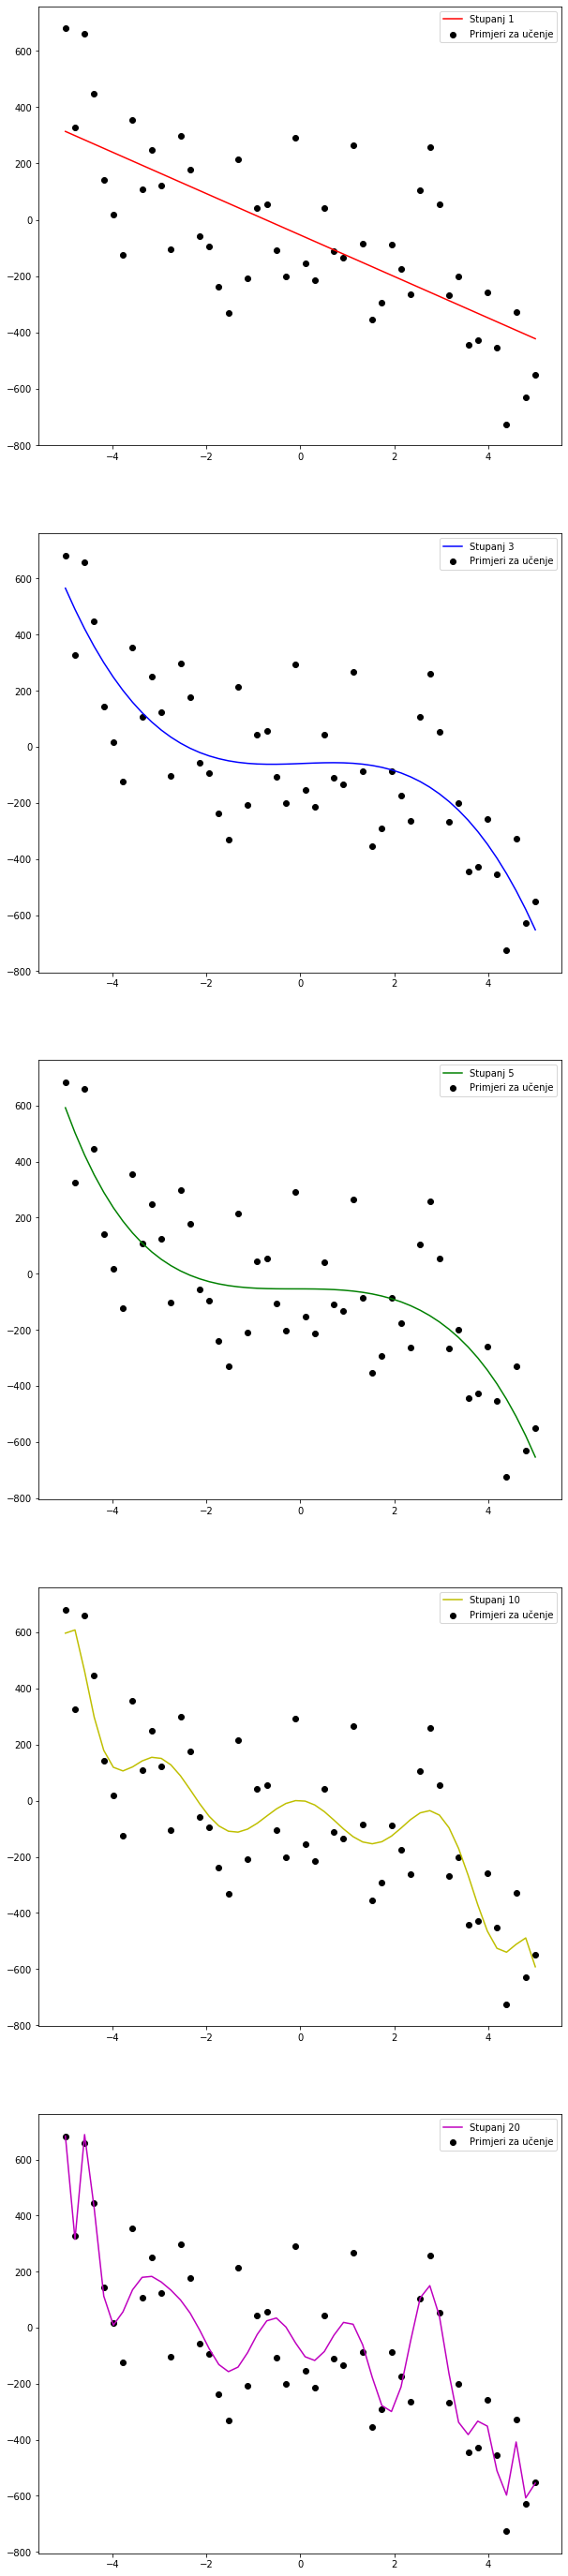

In [15]:
models = [[PolynomialFeatures(1).fit(X, y), 'r'],
          [PolynomialFeatures(3).fit(X, y), 'b'],
          [PolynomialFeatures(5).fit(X, y), 'g'],
          [PolynomialFeatures(10).fit(X, y), 'y'],
          [PolynomialFeatures(20).fit(X, y), 'm']]

fig = plt.figure(figsize=(10, 50))
num = 511

for model, color in models:
    phi = model.fit_transform(X)
    reg = LinearRegression().fit(phi, y)
    h = np.array(reg.predict(phi))
    error = sklearn.metrics.mean_squared_error(y, h)
    print("Pogreška modela stupnja " + str(model.degree) + " je " + str(error))
    ax1 = fig.add_subplot(num)
    num += 1
    ax1.plot(X, h, c=color, label='Stupanj ' + str(model.degree))
    ax1.scatter(X, y, c='k', label='Primjeri za učenje')
    plt.legend(loc='upper right')

plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

Pogreška učenja modela stupnja 1 je 36654.85143776554
Pogreška na primjerima za testiranje modela stupnja 1 je 55428.099553076994

Pogreška učenja modela stupnja 2 je 36064.30277252215
Pogreška na primjerima za testiranje modela stupnja 2 je 58192.874025300254

Pogreška učenja modela stupnja 3 je 29639.36856672219
Pogreška na primjerima za testiranje modela stupnja 3 je 41522.66732635857

Pogreška učenja modela stupnja 4 je 28826.511008433543
Pogreška na primjerima za testiranje modela stupnja 4 je 46602.9407876952

Pogreška učenja modela stupnja 5 je 28599.55898273601
Pogreška na primjerima za testiranje modela stupnja 5 je 44419.68092203252

Pogreška učenja modela stupnja 6 je 25741.24260528998
Pogreška na primjerima za testiranje modela stupnja 6 je 60826.15730280439

Pogreška učenja modela stupnja 7 je 25088.021446043305
Pogreška na primjerima za testiranje modela stupnja 7 je 53853.987016471125

Pogreška učenja modela stupnja 8 je 23274.44470613628
Pogreška na primjerima za testir

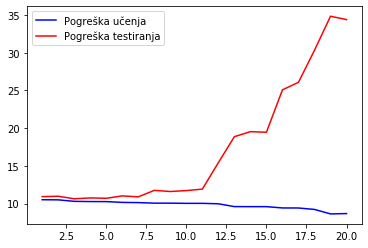

In [17]:
def train_models(d, X, y):
    return [PolynomialFeatures(i).fit(X, y) for i in d]

def calculate_errors(models, X_train, X_test, y_train, y_test, print_info=False):
    errors_train = []
    errors_test = []

    for model in models:
        phi_train = model.fit_transform(X_train)
        phi_test = model.fit_transform(X_test)
        reg = LinearRegression().fit(phi_train, y_train)
      
        h_train = np.array(reg.predict(phi_train))
        error_train = sklearn.metrics.mean_squared_error(y_train, h_train)
        errors_train.append(math.log(error_train))
        
        h_test = np.array(reg.predict(phi_test))
        error_test = sklearn.metrics.mean_squared_error(y_test, h_test)
        errors_test.append(math.log(error_test))
        
        if print_info:
            print("Pogreška učenja modela stupnja " + str(model.degree) + " je " + str(error_train))
            print("Pogreška na primjerima za testiranje modela stupnja " + str(model.degree) + " je " + str(error_test) + "\n")

    return errors_train, errors_test

d = [i for i in range(1, 21)]
from random import randrange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=randrange(10))
errors_train, errors_test = calculate_errors(train_models(d, X, y), X_train, X_test, y_train, y_test, True)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(d, errors_train, c='b', label='Pogreška učenja')
ax1.plot(d, errors_test, c='r', label='Pogreška testiranja')
plt.legend(loc='upper left')
plt.show()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

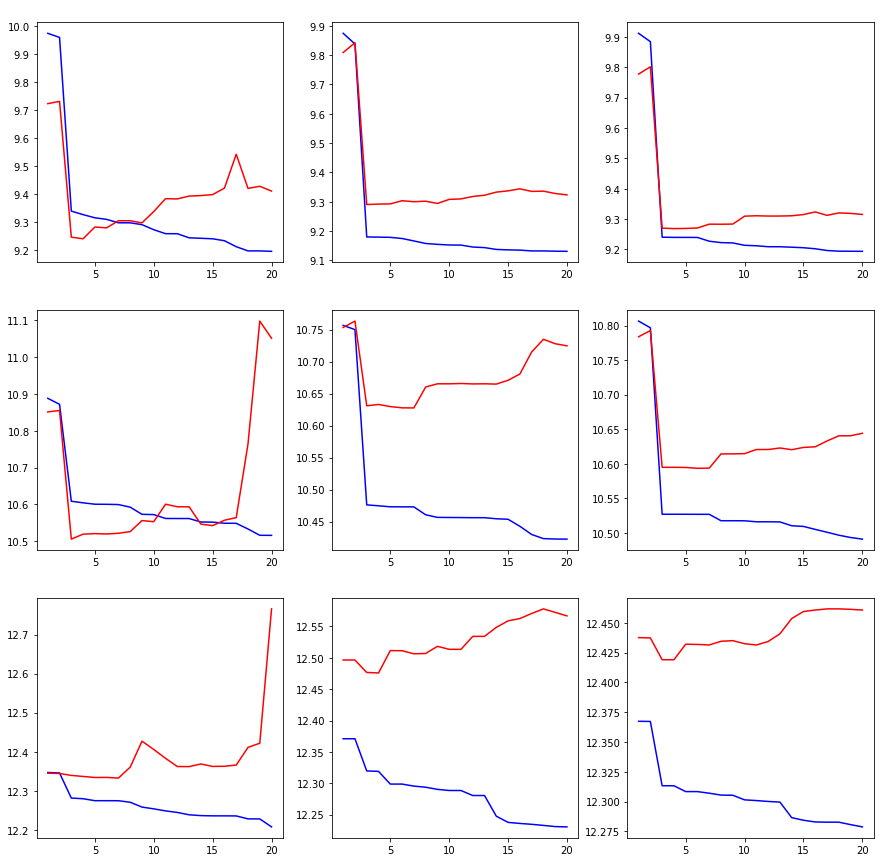

In [18]:
X = make_instances(-5, 5, 1000)
y = make_labels(X, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 100)
X_train, X_test, y_train_100, y_test_100 = train_test_split(X, y, test_size=0.5, random_state=randrange(100))
y_train_200 = make_labels(X_train, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 200)
y_test_200 = make_labels(X_test, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 200)
y_train_500 = make_labels(X_train, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 500)
y_test_500 = make_labels(X_test, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 500)

X_train_33 = [X_train[i] for i in range(int(len(X_train) / 3) + 1)]
X_train_67 = [X_train[i] for i in range(int(len(X_train) / 3) + 1, len(X_train))]
y_train_100_33 = [y_train_100[i] for i in range(int(len(y_train_100) / 3) + 1)]
y_train_100_67 = [y_train_100[i] for i in range(int(len(y_train_100) / 3) + 1, len(y_train_100))]
y_train_200_33 = [y_train_200[i] for i in range(int(len(y_train_200) / 3) + 1)]
y_train_200_67 = [y_train_200[i] for i in range(int(len(y_train_200) / 3) + 1, len(y_train_200))]
y_train_500_33 = [y_train_500[i] for i in range(int(len(y_train_500) / 3) + 1)]
y_train_500_67 = [y_train_500[i] for i in range(int(len(y_train_500) / 3) + 1, len(y_train_500))]

X_test_33 = [X_test[i] for i in range(int(len(X_test) / 3) + 1)]
X_test_67 = [X_test[i] for i in range(int(len(X_test) / 3) + 1, len(X_test))]
y_test_100_33 = [y_test_100[i] for i in range(int(len(y_test_100) / 3) + 1)]
y_test_100_67 = [y_test_100[i] for i in range(int(len(y_test_100) / 3) + 1, len(y_test_100))]
y_test_200_33 = [y_test_200[i] for i in range(int(len(y_test_200) / 3) + 1)]
y_test_200_67 = [y_test_200[i] for i in range(int(len(y_test_200) / 3) + 1, len(y_test_200))]
y_test_500_33 = [y_test_500[i] for i in range(int(len(y_test_500) / 3) + 1)]
y_test_500_67 = [y_test_500[i] for i in range(int(len(y_test_500) / 3) + 1, len(y_test_500))]

def draw_graph(d, errors, x, y, axarr, title=''): 
    axarr[x, y].plot(d, errors[0], c='b', label='Pogreška učenja')
    axarr[x, y].plot(d, errors[1], c='r', label='Pogreška testiranja')
    axarr[x, y].set_title(title, c='w')

f, axarr = plt.subplots(3, 3)
f.set_figheight(15)
f.set_figwidth(15)

draw_graph(d, calculate_errors(train_models(d, X_train_33, y_train_100_33), X_train_33, X_test_33, y_train_100_33, y_test_100_33), 0, 0, axarr, 'Trećina skupa primjera, šum 100')
draw_graph(d, calculate_errors(train_models(d, X_train_67, y_train_100_67), X_train_67, X_test_67, y_train_100_67, y_test_100_67), 0, 1, axarr, 'Dvije trećine skupa primjera, šum 100')
draw_graph(d, calculate_errors(train_models(d, X_train, y_train_100), X_train, X_test, y_train_100, y_test_100), 0, 2, axarr, 'Cijeli skup primjera, šum 100')
draw_graph(d, calculate_errors(train_models(d, X_train_33, y_train_200_33), X_train_33, X_test_33, y_train_200_33, y_test_200_33), 1, 0, axarr, 'Trećina skupa primjera, šum 200')
draw_graph(d, calculate_errors(train_models(d, X_train_67, y_train_200_67), X_train_67, X_test_67, y_train_200_67, y_test_200_67), 1, 1, axarr, 'Dvije trećine skupa primjera, šum 200')
draw_graph(d, calculate_errors(train_models(d, X_train, y_train_200), X_train, X_test, y_train_200, y_test_200), 1, 2, axarr, 'Cijeli skup primjera, šum 200')
draw_graph(d, calculate_errors(train_models(d, X_train_33, y_train_500_33), X_train_33, X_test_33, y_train_500_33, y_test_500_33), 2, 0, axarr, 'Trećina skupa primjera, šum 500')
draw_graph(d, calculate_errors(train_models(d, X_train_67, y_train_500_67), X_train_67, X_test_67, y_train_500_67, y_test_500_67), 2, 1, axarr, 'Dvije trećine skupa primjera, šum 500')
draw_graph(d, calculate_errors(train_models(d, X_train, y_train_500), X_train, X_test, y_train_500, y_test_500), 2, 2, axarr, 'Cijeli skup primjera, šum 500')

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
lambdas = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4, 1, 2, 5])
phi = PolynomialFeatures(3).fit(X, y).fit_transform(X)
m = np.matmul(phi.transpose(), phi)
unit_matrix = np.eye(len(m))
for l in lambdas: 
    unit_m = l * unit_matrix
    unit_m[0, 0] = 0
    w = np.matmul(np.matmul(np.linalg.inv(m + unit_m), phi.transpose()), y)
    print("Za lambda " + str(l))
    print(str(w) + '\n')

Za lambda 0
[ 4.         -5.91666667  3.375      -0.45833333]

Za lambda 1
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]

Za lambda 10
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]



### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge

In [21]:
lambdas = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4, 1, 2, 5])
phi = PolynomialFeatures(3).fit(X, y).fit_transform(X)
for l in lambdas: 
    ridge = Ridge(l, False).fit(phi, y)
    print("Za lambda " + str(l))
    print(str(ridge.coef_) + '\n')

print("Težine su identične onima iz zadatka 4a zato što je parametar fit_intercept postavljen na False."
      + '\nAko se fit_intercept ne postavi na False, Ridge smatra da su podaci "centrirani", odnosno da nema početnog pomaka i da je w0 = 0.')
    

Za lambda 0
[ 4.         -5.91666667  3.375      -0.45833333]

Za lambda 1
[ 1.79567372 -0.24729075 -0.0175289   0.07014758]

Za lambda 10
[0.43312265 0.11060671 0.13827839 0.03093411]

Težine su identične onima iz zadatka 4a zato što je parametar fit_intercept postavljen na False.
Ako se fit_intercept ne postavi na False, Ridge smatra da su podaci "centrirani", odnosno da nema početnog pomaka i da je w0 = 0.


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

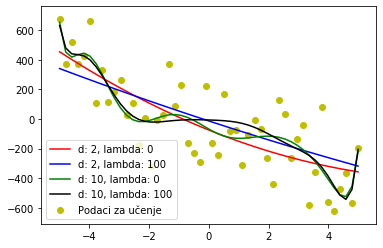

In [22]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 200)
lambdas = [0, 100]
domain = [2, 10]
fig = plt.figure()
ax1 = fig.add_subplot(111)
colors = ['r', 'b', 'g', 'k']
c = 0
for d in domain:
    phi = PolynomialFeatures(d).fit(X, y).fit_transform(X)
    for l in lambdas:
        ridge = Ridge(l, False).fit(phi, y)
        h = ridge.predict(phi)
        ax1.plot(X, h, c=colors[c], label='d: ' + str(d) + ", lambda: " + str(l))
        c+=1
ax1.scatter(X, y, c='y', label='Podaci za učenje')
plt.legend(loc="lower left")
plt.show()

    

### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


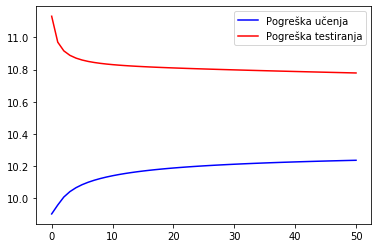

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=randrange(10))
poly = PolynomialFeatures(10).fit(X_train, y_train)
phi_train = poly.fit_transform(X_train)
phi_test = poly.fit_transform(X_test)

errors_train = []
errors_test = []
lambdas = [i for i in range(51)]

for l in lambdas:
    ridge = Ridge(l, False).fit(phi_train, y_train)
    h = ridge.predict(phi_train)
    errors_train.append(math.log(sklearn.metrics.mean_squared_error(y_train, h)))
    
    h = ridge.predict(phi_test)
    errors_test.append(math.log(sklearn.metrics.mean_squared_error(y_test, h)))

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(lambdas, errors_train, c='b', label='Pogreška učenja')
ax1.plot(lambdas, errors_test, c='r', label='Pogreška testiranja')
plt.legend(loc="upper right")
plt.show()

### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

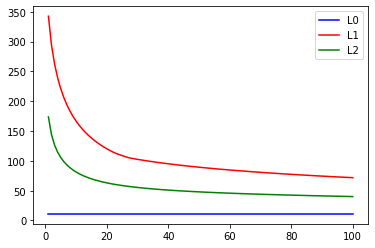

In [25]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x: 5 + x - 2 * math.pow(x, 2) - 5 * math.pow(x, 3), 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=randrange(10))
poly = PolynomialFeatures(10).fit(X_train, y_train)

lambdas =  [i for i in range(1, 101)]
L2 = []
L1 = []
L0 = []
for l in lambdas:
    ridge = Ridge(l, False).fit(phi_train, y_train)
    w = ridge.coef_[0]
    L0.append(nonzeroes(w))
    L1.append(np.linalg.norm(w, 1))
    L2.append(np.linalg.norm(w, 2))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(lambdas, L0, c='b', label='L0')
ax1.plot(lambdas, L1, c='r', label='L1')
ax1.plot(lambdas, L2, c='g', label='L2')
plt.legend(loc="upper right")
plt.show()

    
    

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

/home/djaksic/PycharmProjects/SU_Lab1/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1324957.1173145839, tolerance: 316.511859039767
  positive)
/home/djaksic/PycharmProjects/SU_Lab1/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1331806.7201971943, tolerance: 316.511859039767
  positive)
/home/djaksic/PycharmProjects/SU_Lab1/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1338227.0703920922, tolerance: 316.511859039767
  positive)
/home/djaksic/PycharmProjects/SU_Lab1/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: Co

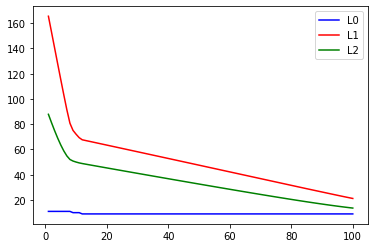

In [26]:
from sklearn import linear_model

L2 = []
L1 = []
L0 = []
for l in lambdas:
    lasso = linear_model.Lasso(l, fit_intercept=False).fit(phi_train, y_train)
    w = lasso.coef_
    L0.append(nonzeroes(w))
    L1.append(np.linalg.norm(w, 1))
    L2.append(np.linalg.norm(w, 2))
 
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(lambdas, L0, c='b', label='L0')
ax1.plot(lambdas, L1, c='r', label='L1')
ax1.plot(lambdas, L2, c='g', label='L2')
plt.legend(loc="upper right")
plt.show()

### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [27]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

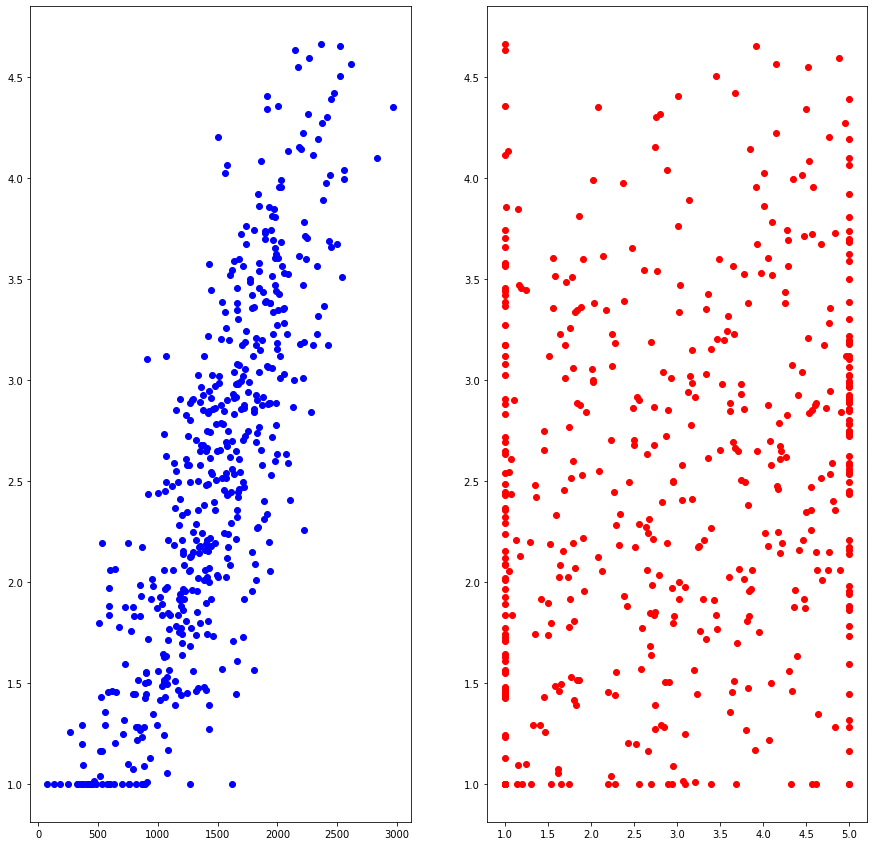

In [28]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(121)
ax1.scatter(exam_score, grades_y, c='b', label='Ispit')
ax2 = fig.add_subplot(122)
ax2.scatter(grade_in_highschool, grades_y, c='r', label='Ocjene')
plt.show()

**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

w = [0.00147711 0.1106004 ]


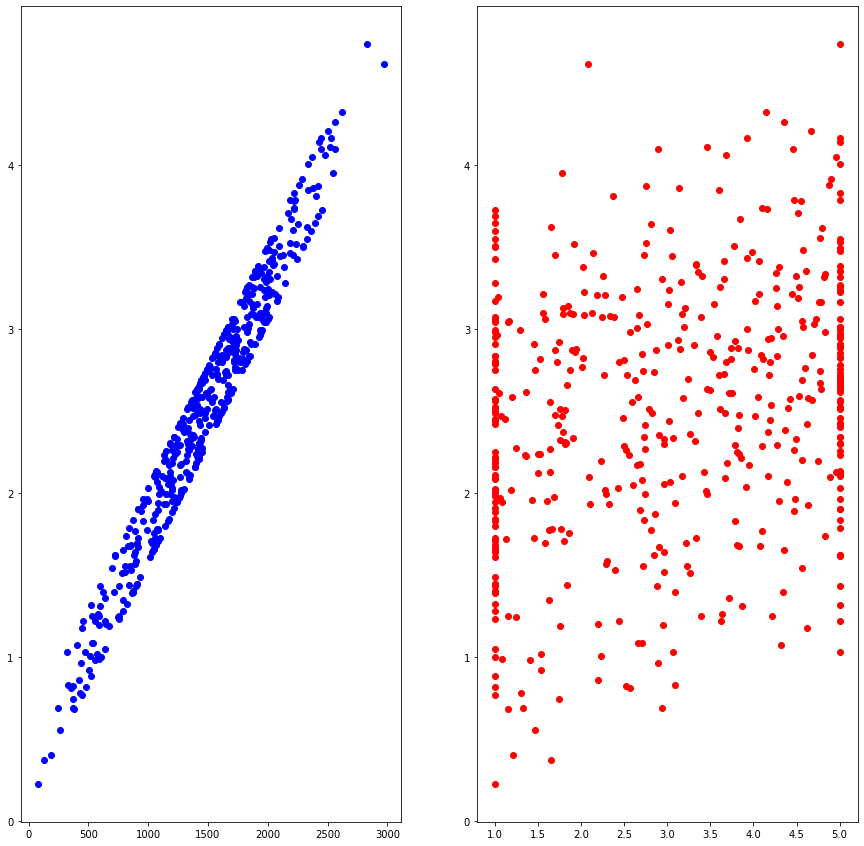

In [29]:
ridge = Ridge(0.01, False).fit(grades_X, grades_y)
print('w = ' + str(ridge.coef_))
grades_y_ridge = ridge.predict(grades_X)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(121)
ax1.scatter(exam_score, grades_y_ridge, c='b', label='Ispit')
ax2 = fig.add_subplot(122)
ax2.scatter(grade_in_highschool, grades_y_ridge, c='r', label='Ocjene')
plt.show()
    

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [30]:
from sklearn.preprocessing import StandardScaler

w = [0.81630375 0.15167761]


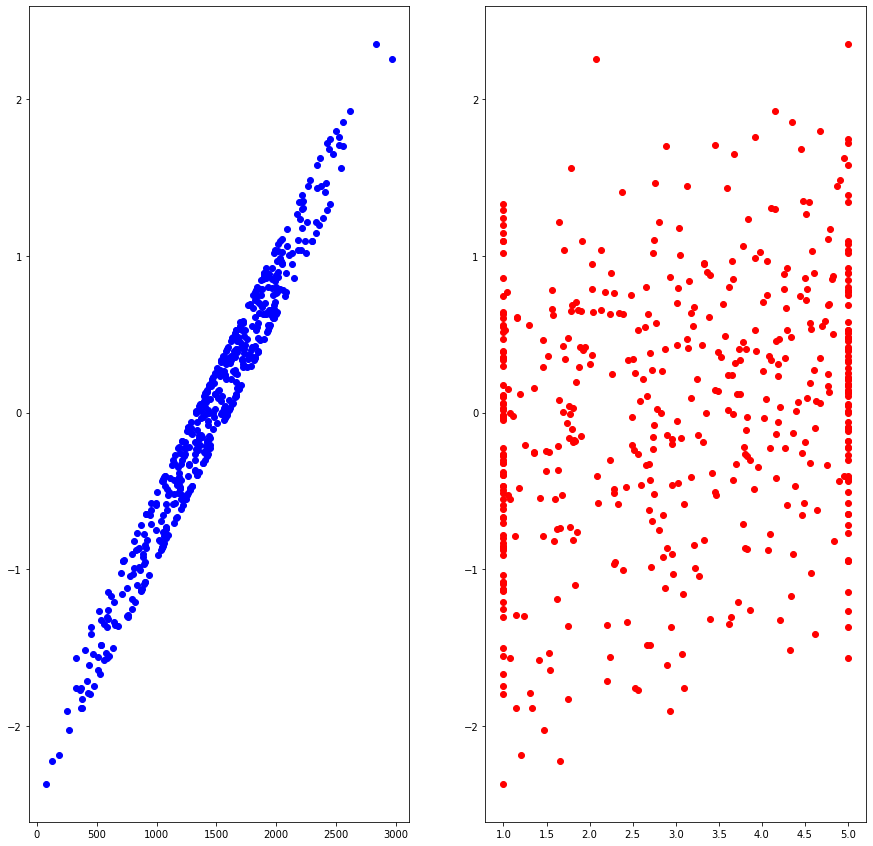

In [31]:
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))
ridge = Ridge(0.01, False).fit(grades_X_fixed, grades_y_fixed)
print('w = ' + str(ridge.coef_[0]))
grades_y_fixed_ridge = ridge.predict(grades_X_fixed)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(121)
ax1.scatter(exam_score, grades_y_fixed_ridge, c='b', label='Ispit')
ax2 = fig.add_subplot(122)
ax2.scatter(grade_in_highschool, grades_y_fixed_ridge, c='r', label='Ocjene')
plt.show()

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [32]:
grades_X_fixed_colinear = StandardScaler().fit_transform(np.array([exam_score,grade_in_highschool,grade_in_highschool]).T)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [33]:
ridge = Ridge(0.01, False).fit(grades_X_fixed_colinear, grades_y_fixed)
print("w = " + str(ridge.coef_[0]))

w = [0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [34]:
w1 = []
w2 = []
test = []
for i in range(10):
    X_train, ignore, y_train, ignore2 = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5, random_state=i)
    ridge1 = Ridge(0.01, False).fit(X_train, y_train)
    ridge2 = Ridge(1000, False).fit(X_train, y_train)
    w1.append(ridge1.coef_[0])
    w2.append(ridge2.coef_[0])
    print("lambda 0.01, w1 = " + str(ridge1.coef_[0]))
    print("lambda 1000, w2 = " + str(ridge2.coef_[0]))
    print()

print("Standardne devijacije uz lambda 0.01 su " + str(np.std(np.array(w1), axis=0)))
print("Standardne devijacije uz lambda 1000 su " + str(np.std(np.array(w2), axis=0)))


lambda 0.01, w1 = [0.81964632 0.04966431 0.04966431]
lambda 1000, w2 = [0.16375609 0.02070867 0.02070867]

lambda 0.01, w1 = [0.82281442 0.08324185 0.08324185]
lambda 1000, w2 = [0.16270125 0.0368631  0.0368631 ]

lambda 0.01, w1 = [0.83775433 0.06617722 0.06617722]
lambda 1000, w2 = [0.16935318 0.02573995 0.02573995]

lambda 0.01, w1 = [0.81158816 0.06287009 0.06287009]
lambda 1000, w2 = [0.16437115 0.03382111 0.03382111]

lambda 0.01, w1 = [0.80479341 0.09375805 0.09375805]
lambda 1000, w2 = [0.15111006 0.03752844 0.03752844]

lambda 0.01, w1 = [0.82037515 0.07885349 0.07885349]
lambda 1000, w2 = [0.15485538 0.03574607 0.03574607]

lambda 0.01, w1 = [0.82202629 0.07853294 0.07853294]
lambda 1000, w2 = [0.1675877  0.03679707 0.03679707]

lambda 0.01, w1 = [0.81459912 0.08054578 0.08054578]
lambda 1000, w2 = [0.16665928 0.03700283 0.03700283]

lambda 0.01, w1 = [0.81424094 0.07173773 0.07173773]
lambda 1000, w2 = [0.17419005 0.03718289 0.03718289]

lambda 0.01, w1 = [0.79109439 0.08636

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [35]:
lambdas = [0.01, 10]
for l in lambdas:
    m = np.matmul(grades_X_fixed_colinear.transpose(), grades_X_fixed_colinear)
    unit_lambda = l * np.eye(len(m))
    unit_lambda[0, 0] = 0
    m = np.add(m, unit_lambda)
    print("Lambda " + str(l) + ", kondicija: " + str(np.linalg.cond(m)))

Lambda 0.01, kondicija: 100542.85592820004
Lambda 10, kondicija: 101.53146069838155


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  